In [1]:
signal_tree = Tree(NMSSM_MX_700_MY_400)
bkgd_tree = Tree(QCD_B_List + [TTJets])
# data_tree = Tree(JetHT_Data_UL)

In [ ]:
def get_masked_dist(bkgd_list):
    new_list = []
    for bkgd_dist, scores, mass in zip(bkgd_list, bkgd_tree.b_6j_score, bkgd_tree.t6_higgs_m):
        new_list.append(bkgd_dist[(scores > 0.8) & ak.all(abs(mass - 125) > 60, axis=1)])

In [2]:
from utils.analysis import get_scaled_weights

In [8]:
n_6j, bins, x = get_scaled_weights(bkgd_tree.b_6j_score, score_bins, bkgd_tree.scale)

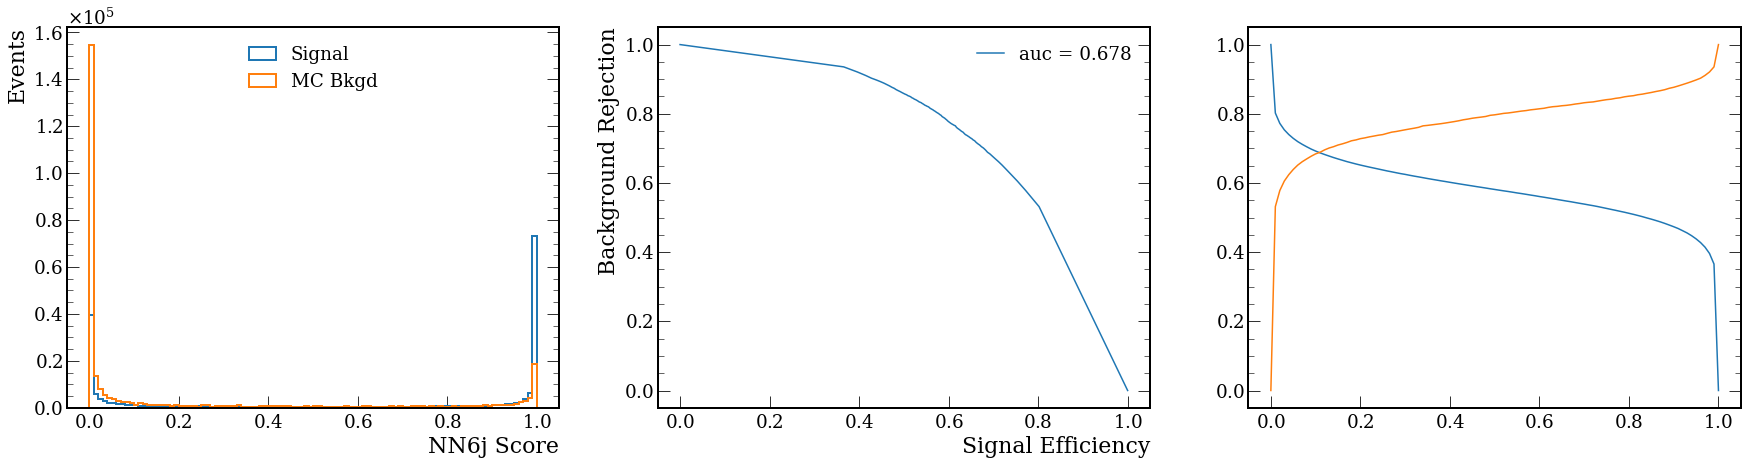

In [67]:
fig, axs = plt.subplots(figsize=(30,7), nrows=1, ncols=3)

ax = axs[0]
n_sgnl, b = Hist(signal_tree.b_6j_score, bins=bins, ax=ax, label='Signal')#, log=True)
n_bkgd, b = Hist(x, weights=n_6j, bins=bins, ax=ax, label='MC Bkgd')#, log=True)
ax.legend(loc=9)
ax.set_xlabel('NN6j Score')
ax.set_ylabel('Events')

ax = axs[1]
eff_sig = np.append(np.array(1), 1-n_sgnl.cumsum()/n_sgnl.sum())
rej_bkg = np.append(0,n_bkgd.cumsum()/n_bkgd.sum())
dx = eff_sig[:-1] - eff_sig[1:]
auc = np.sum(rej_bkg[:-1] * dx)
ax.plot(eff_sig, rej_bkg)
ax.set_xlabel('Signal Efficiency')
ax.set_ylabel('Background Rejection')
ax.legend([f'auc = {auc:.3f}'])
score_bins[(abs(eff-auc)+abs(rej-auc)).argmin()]

ax = axs[2]
ax.plot(score_bins, eff_sig, label='Signal Efficiency')
ax.plot(score_bins, rej_bkg, label='Bkgd Rejection')